In [3]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Convolution2D,Activation
from keras.preprocessing.image import ImageDataGenerator

#Initialising the CNN
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(8,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compiling the CNN
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

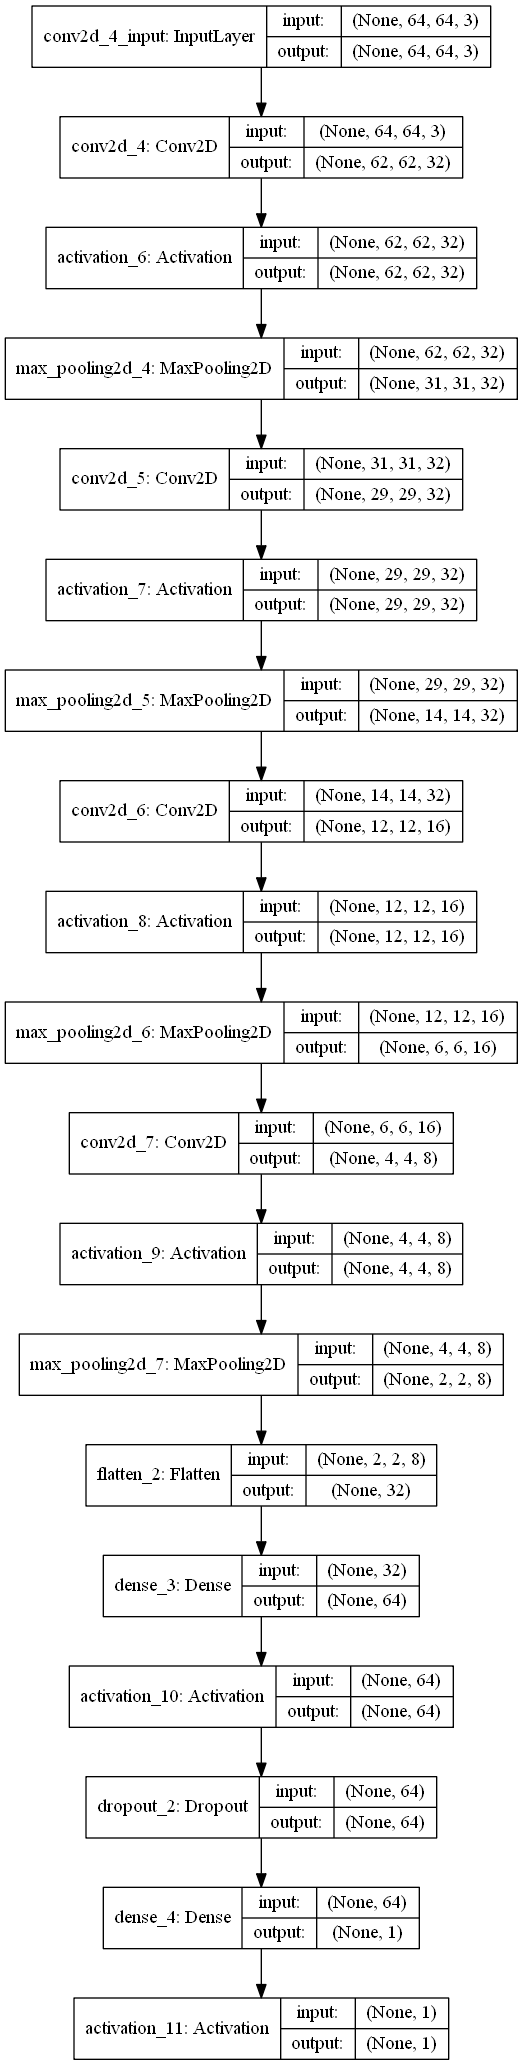

In [4]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [5]:
training_set = train_datagen.flow_from_directory(
'data_set/train',
target_size=(64, 64),
batch_size=32,
class_mode='binary')

test_set = test_datagen.flow_from_directory(
'data_set/test',
target_size=(64,64),
batch_size=32,
class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
import tensorflow as tf

class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.save(str(val_acc)+'_model.h5')

            
my_callback = MyThresholdCallback(threshold=0.9) 
model.fit_generator(
training_set,
epochs=100,
validation_data=test_set,callbacks=[my_callback])

Epoch 1/100
163/163 [==============================] - 83s 512ms/step - loss: 0.2723 - accuracy: 0.8859 - val_loss: 0.3815 - val_accuracy: 0.8910
Epoch 2/100
163/163 [==============================] - 84s 515ms/step - loss: 0.2592 - accuracy: 0.8963 - val_loss: 0.2549 - val_accuracy: 0.8782
Epoch 3/100
163/163 [==============================] - 84s 516ms/step - loss: 0.2312 - accuracy: 0.9082 - val_loss: 0.2922 - val_accuracy: 0.9006
Epoch 4/100
163/163 [==============================] - 86s 527ms/step - loss: 0.2144 - accuracy: 0.9183 - val_loss: 0.2442 - val_accuracy: 0.9087
Epoch 5/100
163/163 [==============================] - 85s 521ms/step - loss: 0.2024 - accuracy: 0.9250 - val_loss: 0.3659 - val_accuracy: 0.8750
Epoch 6/100
163/163 [==============================] - 86s 527ms/step - loss: 0.1859 - accuracy: 0.9245 - val_loss: 0.4626 - val_accuracy: 0.8910
Epoch 7/100
163/163 [==============================] - 85s 520ms/step - loss: 0.1818 - accuracy: 0.9317 - val_loss: 0.0281 -